## Discrete System and Equivalent Discrete Model

Transitioning from continuous-time to discrete-time models is fundamental in modern communication systems, primarily due to the prevalence of digital processing techniques. 

This section elaborates on sampling continuous-time signals $ x(t) $ and $ y(t) $ at a sampling rate of $ W_s $ samples/second.

### Sampling Process

**Sampling Rate ($ W_s $)**: The number of samples taken per second from the continuous-time signals $ x(t) $ and $ y(t) $. 

It must satisfy the Nyquist-Shannon Sampling Theorem to prevent aliasing.
  
$$
W_s \geq 2W_{\text{max}}
$$

where $ W_{\text{max}} $ is the **maximum frequency component** present in the signal.

**Bandwidth ($ B $) vs. Sampling Rate ($ W_s $)**: To avoid confusion, it's crucial to distinguish between the **signal bandwidth** and the **sampling rate**. 

Ensure that the signal bandwidth $ B $ satisfies $ B \leq \frac{W_s}{2} $.



#### Sampling Continuous-Time Signals

Given continuous-time signals $ x(t) $ (transmitted signal) and $ y(t) $ (received signal), sampling at rate $ W_s $ yields discrete-time sequences $ x_b[m] $ and $ y_b[m] $, where $ m $ is an integer index representing the sample number.

$$
x_b[m] = x\left( \frac{m}{W_s} \right) \quad \text{and} \quad y_b[m] = y\left( \frac{m}{W_s} \right)
$$

**Reconstruction Theorem:**

The continuous-time baseband signal $ x_b(t) $ can be reconstructed from its samples $ x_b[m] $ using the sinc interpolation formula:

$$ \boxed{
x_b(t) = \sum_{m=-\infty}^{\infty} x_b[m] \cdot \text{sinc}\left( W_s t - m \right)
}
$$

where 

- Sampling Rate ($ W_s $): Explicitly denoted as $ W_s $, which equals $ 2W_{\max} $.

- Sampling Interval: $ T_s = \frac{1}{W_s} = \frac{1}{2W_{\max}} $

- Samples: $ x_b[m] $ represents the sampled values of $ x_b(t) $ at integer multiples of $ T_s $, i.e., $ x_b[m] = x\left(\frac{m}{W_s}\right) = x\left(\frac{m}{2W_{\max}}\right) $

- Sinc Function Argument: $ \text{sinc}\left( W_s t - m \right) = \text{sinc}\left(2W_{\max} t - m \right) $


Note that

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}
$$
  
The sinc functions act as ideal low-pass filters that interpolate between samples to reconstruct the original continuous-time signal.

**Alternative Expression**

$$
\boxed{
x(t) = \sum_{n=-\infty}^{\infty} x\left(\frac{n}{2W_{\max}}\right) \cdot \text{sinc}\left(2W_{\max} \left(t - \frac{n}{2W_{\max}}\right)\right)
}
$$

- Sampling Rate ($ W_s $): Here, $ 2W_{\max} $ is the Nyquist sampling rate ($ W_s $), where $ W_{\max} $ is the maximum frequency of the band-limited signal $ x(t) $.

- Sampling Interval: $ T_s = \frac{1}{W_s} = \frac{1}{2W_{\max}} $

- Samples: $ x\left(\frac{n}{2W_{\max}}\right) $ represents the sampled values of $ x(t) $ at intervals of $ T_s $.

- Sinc Function Argument: $ \text{sinc}\left(2W_{\max} \left(t - \frac{n}{2W_{\max}}\right)\right) = \text{sinc}(2W_{\max} t - n) $



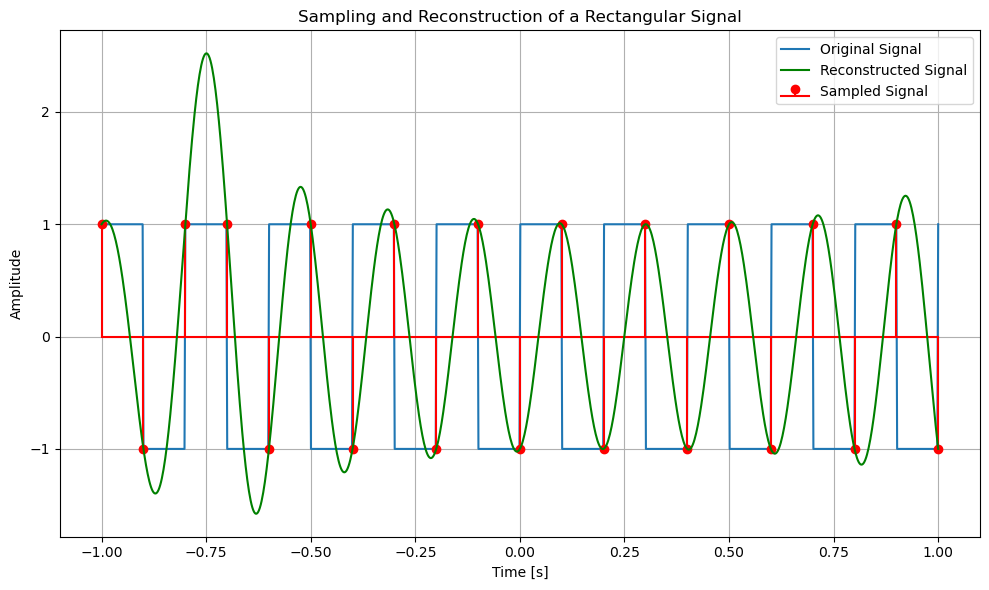

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Define the frequency of the rectangular signal
f0 = 5  # frequency in Hz

# Define the time vector with a high enough resolution
t = np.linspace(-1, 1, 1000)

# Create the rectangular signal using the square function
rect_signal = square(2 * np.pi * f0 * t)

# Define the Nyquist rate, which is twice the highest frequency
W_max = f0  # highest frequency contained in the signal is f0
fs = 2 * W_max  # Nyquist rate (twice the highest frequency)

# Example of undersampling (below the Nyquist rate)
# fs = 0.7 * W  # Note: This is below the Nyquist rate and may cause aliasing

# Sample the signal at the Nyquist rate
sample_times = np.arange(-1, 1 + 1/fs, 1/fs)
sampled_signal = square(2 * np.pi * f0 * sample_times)

# Reconstruction using sinc interpolation
T = 1 / fs  # sampling interval
reconstructed_signal = np.zeros_like(t)

for n in range(len(sampled_signal)):
    # Shifted sinc functions for each sample
    reconstructed_signal += sampled_signal[n] * np.sinc((t - sample_times[n]) / T)

# Plotting the original and sampled signals along with the reconstructed signal
plt.figure(figsize=(10, 6))

# Original signal
plt.plot(t, rect_signal, linewidth=1.5, label='Original Signal')

# Sampled signal
plt.stem(sample_times, sampled_signal, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal')

# Reconstructed signal
plt.plot(t, reconstructed_signal, linewidth=1.5, color='g', label='Reconstructed Signal')

# Labels and title
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sampling and Reconstruction of a Rectangular Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Equivalent Discrete-Time Model

The equivalent discrete-time baseband model of the discrete passband communication system is expressed as:

$$ \boxed{
y_b[m] = h_b[m] \ast x_b[m] + n_b[m]
}
$$

where:

- $ y_b[m] $: Received discrete-time signal.
- $ h_b[m] $: Discrete-time channel impulse response.
- $ x_b[m] $: Transmitted discrete-time signal.
- $ n_b[m] $: Discrete-time additive noise.
- Convolution ($ \ast $): Represents the discrete convolution operation between $ h_b[m] $ and $ x_b[m] $.

### Discrete Channel Impulse Response $ h_b[m] $

The discrete-time channel impulse response $ h_b[m] $ is derived from the continuous-time baseband channel $ h_b(t) $ as follows:

$$
h_b[m] = h_b\left( \frac{m}{W_s} \right) \ast \text{sinc}\left( Wt \right) \Big|_{t = \frac{m}{W_s}}
$$

$$
h_b[m] = \int_{-\infty}^{\infty} h_b(\tau) \cdot \text{sinc}\left( W\left( \tau - \frac{m}{W_s} \right) \right) d\tau
$$

**Explanation:**

- **Projection onto Sinc Function:** This integral projects the continuous-time channel $ h_b(t) $ onto the discrete-time domain by convolving it with the sinc function and sampling at $ t = \frac{m}{W_s} $.
  
- **Ideal Low-Pass Filter Assumption:** The sinc function acts as an ideal low-pass filter that preserves the baseband characteristics during sampling.

### Discrete Received Signal $ y_b[m] $

The discrete-time received signal $ y_b[m] $ is obtained by sampling the baseband received signal $ y_b(t) $ at $ t = \frac{m}{W_s} $:

$$
y_b[m] = y_b\left( \frac{m}{W_s} \right)
$$

**Explanation:**

- **Baseband Received Signal:** $ y_b(t) = h_b(t) \ast x_b(t) + n_b(t) $, where $ n_b(t) $ is the baseband noise.
  
- **Sampling:** Sampling $ y_b(t) $ at discrete intervals $ \frac{m}{W_s} $ yields $ y_b[m] $.

### Discrete-Time Noise Model $ n_b[m] $

The discrete-time noise $ n_b[m] $ is derived from the continuous-time baseband noise $ n_b(t) $:

$$
n_b[m] = n_b\left( \frac{m}{W_s} \right)
$$

**Autocorrelation Function $ R_{n_b}[l] $:**

$$
R_{n_b}[l] = \mathbb{E}\{ n_b[m] \cdot {n_b}^*[m + l] \} = R_{n_b}\left( \frac{l}{W_s} \right)
$$

It should be clarified that $ R_{n_b}[l] $ is derived from the continuous autocorrelation function $ R_{n_b}(t) $ evaluated at $ t = \frac{l}{W_s} $.

**Explanation:**

- **Discrete Autocorrelation:** $ R_{n_b}[l] $ represents the autocorrelation of the discrete noise $ n_b[m] $ at lag $ l $.
  
- **Continuous-to-Discrete Mapping:** The autocorrelation at discrete lag $ l $ corresponds to the continuous autocorrelation at $ \frac{l}{W_s} $.

- **Stationarity Assumption:** It is assumed that the noise $ n_b[m] $ is Wide-Sense Stationary (WSS), meaning $ R_{n_b}[l] $ depends only on the lag $ l $, not on the absolute time index $ m $.

### Summary of Discrete Model

The complete discrete-time model is as follows:

1. **Discrete-Time Received Signal:**

   $$
   y_b[m] = h_b[m] \ast x_b[m] + n_b[m]
   $$

2. **Reconstruction of Baseband Transmitted Signal:**

   $$
   x_b(t) = \sum_{m=-\infty}^{\infty} x_b[m] \cdot \text{sinc}\left( Wt - m \right)
   $$

3. **Sampling of Baseband Received Signal:**

   $$
   y_b[m] = y_b\left( \frac{m}{W_s} \right)
   $$

4. **Discrete-Time Channel Impulse Response:**

   $$
   h_b[m] = \int_{-\infty}^{\infty} h_b(\tau) \cdot \text{sinc}\left( W\left( \tau - \frac{m}{W_s} \right) \right) d\tau
   $$

5. **Discrete-Time Noise Autocorrelation:**

   $$
   \boxed{
   R_{n_b}[l] = R_{n_b}\left( \frac{l}{W_s} \right)
   }
   $$